# Traffic Accident - Risk Analysis Using Machine Learning
Problem: 
According to the World Health Organization, road traffic caused an estimated 1.25 million deaths worldwide in the year 2013. According to Insurance Institute for Highway Safety, Highway Loss Data Institute,in the 2016 the US had 34,439 fatal motor vehicle crashes and out of those 37,461 deaths occured. 

Proposal: 
Use machine learning to produce a risk model to correlate the number of injuries/deaths in an accident against the time of day and the zipcode they occur. A binary classification will be utilized on the injuries/deaths: 0 for no injuries or deaths and 1 for and injuries and/or deaths in that accident.

Use case:
Beneficial for autonomous vehicles and car services for route decisions.

## Dataset
https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
This is a breakdown of every collision in NYC by location and injury provided by the New York Police Department (NYPD) and was made public on May 7th, 2014. 

The dataset consists of 29 attributes. Due to the size of this file, some columns were excluded in the dataframe such as "Latitude", "Longitude", "location", and "unique key". 

In [2]:
#Typical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Real-time data from https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data
#Uploading the data from start date(5/7/2014 made public) to 11/16/18
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
df = df.drop(df[pd.to_numeric(df['ZIP CODE'], errors ='coerce').isna()].index) #taking out rows without zip code input

#Categorizing by zip code; latitude, longitude, location is not needed)
df = df.drop(columns=['LATITUDE', 'LONGITUDE', 'LOCATION']) 
#unique key is also not needed...just a randomly generated key
df = df.drop(columns=['UNIQUE KEY']) 
df.head(20)

C:\Users\Maggie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10:00,MANHATTAN,10010,5 AVENUE,BROADWAY,NaN,0,0,0,...,Unspecified,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,11/16/2018,0:45:00,BROOKLYN,11211,BORINQUEN PLACE,HAVEMEYER STREET,NaN,4,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00:00,BRONX,10454,EAST 137 STREET,WILLOW AVENUE,NaN,0,0,0,...,Pavement Slippery,Unspecified,NaN,NaN,NaN,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00:00,BROOKLYN,11221,WILSON AVENUE,PALMETTO STREET,NaN,0,0,0,...,Pavement Slippery,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/16/2018,2:50:00,BRONX,10451,EAST 149 STREET,GERARD AVENUE,NaN,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Taxi,Taxi,NaN,NaN,NaN
9,11/16/2018,5:30:00,QUEENS,11417,ROCKAWAY BOULEVARD,CENTREVILLE AVENUE,NaN,1,0,1,...,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11/16/2018,5:45:00,MANHATTAN,10128,EAST 88 STREET,2 AVENUE,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
12,11/16/2018,6:02:00,BROOKLYN,11206,NaN,NaN,787 BROADWAY,0,0,0,...,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,Garbage or Refuse,Sedan,NaN,NaN,NaN
13,11/16/2018,6:10:00,MANHATTAN,10128,EAST 92 STREET,2 AVENUE,NaN,0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
14,11/15/2018,0:00:00,BROOKLYN,11228,NaN,NaN,1421 71 STREET,0,0,0,...,Failure to Yield Right-of-Way,Alcohol Involvement,Unspecified,NaN,NaN,Sedan,Sedan,Sedan,NaN,NaN


## Seperating and Organizing the Zipcodes

The following code is used seperate the organize the zipcodes by the number of accidents that occurred in each from greatest to least. Many of the zipcodes were empty and as such that accident was removed from the dataframe and the ensuing analysis. The resulting zipcodes were then plotted on a scatter to get a view of the most and least accident prone zipcodes. It appears that zip code 11207 is the most accident prone with a total of 12763 accidents in the past 4 years.

num samples = 720004, num attributes = 25


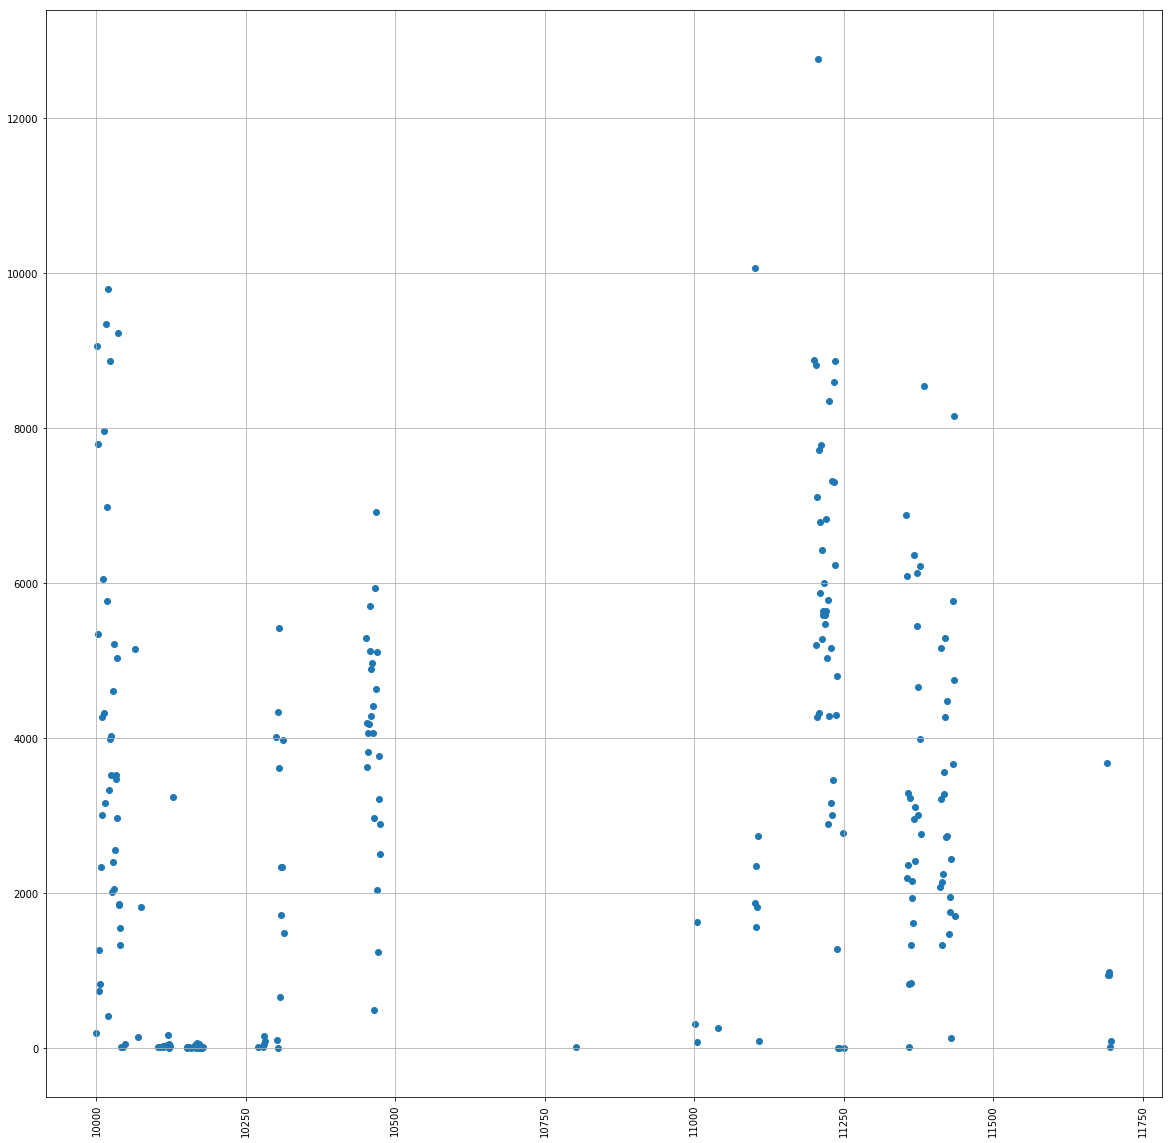

In [152]:
nsamp, natt = df.shape
print('num samples = {0:d}, num attributes = {1:d}'.format(nsamp,natt))

#General visualization of zip codes
x_unfiltered = np.array(df['ZIP CODE'])
#print(x_unfiltered[0:10])

x_unfiltered = pd.Series(x_unfiltered)
#print(x_unfiltered[0:10])

zipcode = x_unfiltered.astype(int) #casting to integer from float
#print(zipcode[0:10])

#number of accidents per zip code
naccidents = pd.Series(zipcode).value_counts().tolist()
#print(pd.Series(zipcode).value_counts())

plt.figure(figsize=(20,20))
plt.scatter(pd.Series(zipcode).value_counts().index.tolist(), pd.Series(zipcode).value_counts())
plt.xticks(rotation = 90)
plt.grid()

Below is also a chart of NYC boroughs and their corresponding zip codes.

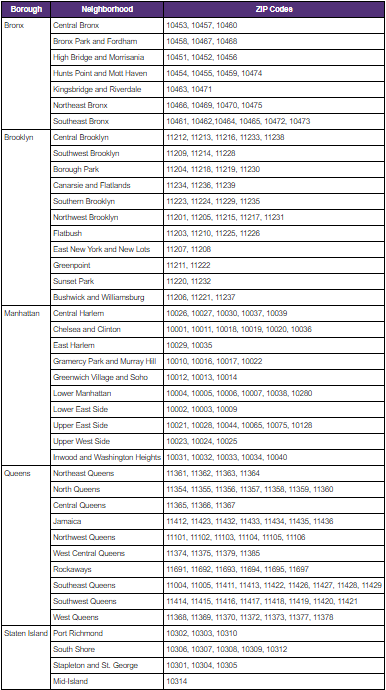

## Binary Classification of Casualties

The number of casualties was taken from the sum of injuries and deaths combined per accident. The obtained column was then parsed for NaNs which were set to 0. The casualties were then classified as either 0 (no casulaties) or 1 (1 or more casualties). The zipcodes were then again obtained, this time in the same order as the casualties. Finally, a logistic regression classifier was fit using 1000 samples. 

In [154]:
from sklearn import linear_model, preprocessing

# Make binary array on whether there were casualties or not at an accident
cas_data = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
cas_data = cas_data.replace('NaN', 0)
#print(cas_data[0:20])
cas_final = np.sum(cas_data, axis=1)
#print(cas_final[0:20])
cas_final[cas_final > 0] = 1
#print(cas_final[0:20])

# Get array of zipcodes in same order
zip_data = df[['ZIP CODE']]
#print(zip_data[0:20])

# Create logistic Regression object and Fit Training Data - Casualties vs Zipcode
logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(zip_data[0:1000], cas_final[0:1000]) # Use 100 values to determine classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Testing the Accuracy of the Classifier

The classifier was then tested for accuracy by predicting casualties for the first 5000 accidents. The results are shown below with a scatter plot of the casualties vs. zipcode for both actual and predicted number of casulaties. As seen there is a 80.9% accuracy in the model. However, the model consistently guesses 0 for all cases due to the overwhelming amount of them in the dataset. 

Accuracy is 0.809000


Text(0,0.5,'Casualties')

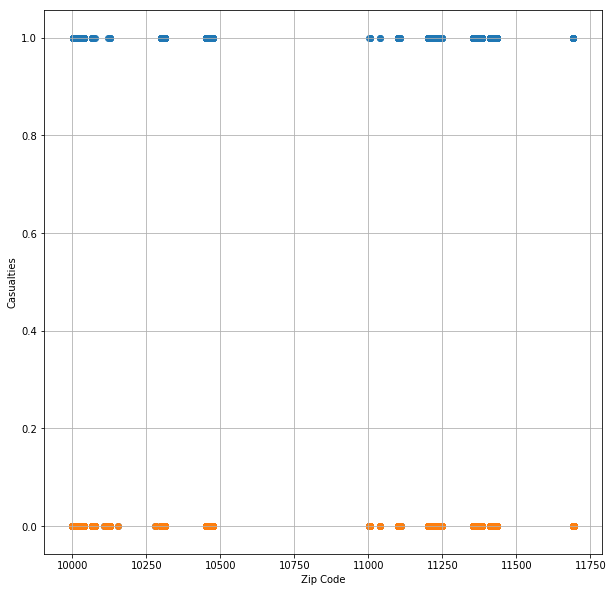

In [155]:
# Test accuracy of the classifier created
from sklearn import metrics

cas_final_hat = logreg.predict(zip_data[0:5000])
cas_final_prob = logreg.predict_proba(zip_data[0:5000])
acc = np.mean(cas_final_hat == cas_final[0:5000])
print('Accuracy is {0:f}' .format(acc))

# Graph
plt.figure(figsize=(10,10))
plt.scatter(zip_data[0:5000], cas_final[0:5000])
plt.scatter(zip_data[0:5000], cas_final_hat)
plt.grid()
plt.xlabel('Zip Code')
plt.ylabel('Casualties')

## Getting Time from the Dataset

The TIME column was added to the DATE column to be able to run datetime analysis and operations on the times of the accidents. The time and date was changed to datetime format using the "datetime" package. The datetimes were then rounded to the nearest hour for better analysis and correlation. The datetime was then seperated back into seperate date and time arrays for further operation on the times. The resulting time array was then changed to remove the semicolons and make the time one continous number. 

In [156]:
from datetime import datetime, timedelta

time_data = df['DATE'] + ' ' + df['TIME']
#print(time_data[0:20])

time_Data = pd.to_datetime(time_data)
#print(time_Data[0:20])

time_DATA = pd.Series(time_Data).dt.round('H')
#print(time_DATA[0:20])

tIME, dATE = time_DATA.apply(lambda x:x.time()), time_DATA.apply(lambda x:x.date())
#print(tIME[0:20])

time_final = tIME.apply(lambda x:x.strftime('%H%M%S'))
#print(time_final[0:20])



## Time Array Conversion

The previous time array is then converted into an interger array with values ranging from 0 to 23. This time array will then be used in the logistic regression. 

In [157]:
time_final2 = np.row_stack(time_final)
#print(time_final2[0:20])
list_stuff = time_final2[0::]
list_final = []
for i in range(len(list_stuff)-1):
    list_final.append(int(list_stuff[i])/10000)
    
time_array = np.asarray(list_final)
time_array2 = time_array.reshape(-1, 1)
#print(time_array2)

#print(list_final[0:20])

## Fitting the Classifier

A logisic regression classifier is then fitted using the previously obtained casualty values and the recently created time array using 1000 samples. 

In [158]:
from sklearn import linear_model, preprocessing

# Create logistic Regression object and Fit Training Data - Casualties vs Time of Accident
logreg2 = linear_model.LogisticRegression(C = 1e5)
logreg2.fit(time_array2[0:1000], (cas_final[0:1000]))# Use 100 values to determine classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Testing the Accuracy of the Classifier
The classifier was then tested for accuracy by predicting casualties for the first 5000 accidents. The results are shown below with a scatter plot of the casualties vs. time of day of the incident for both actual and predicted number of casulaties. As seen there is a 80.9% accuracy in the model. However, the model consistently guesses 0 for all cases due to the overwhelming amount of them in the dataset. 

Accuracy is 0.809000


Text(0,0.5,'Casualties')

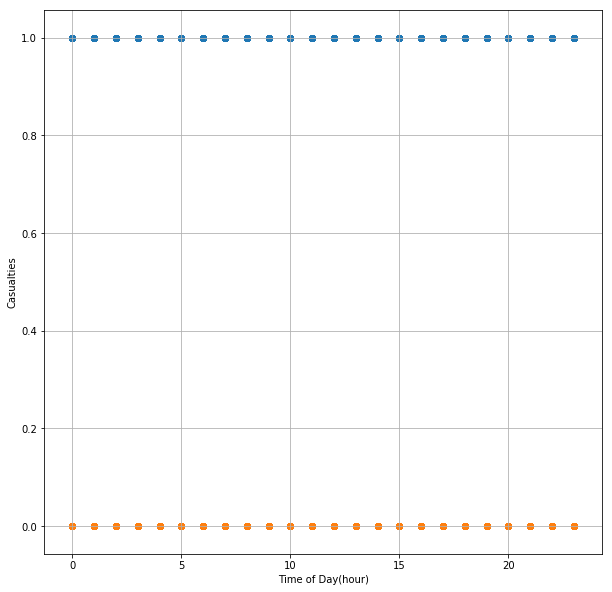

In [159]:
# Test accuracy of the classifier created
from sklearn import metrics

cas_final_hat2 = logreg2.predict(time_array2[0:5000])
#cas_final_prob2 = logreg2.predict_proba(time_array2[0:500])
acc2 = np.mean(cas_final_hat2 == cas_final[0:5000])
print('Accuracy is {0:f}' .format(acc2))

# Graph
plt.figure(figsize = (10,10))
plt.scatter(time_array2[0:5000], cas_final[0:5000])
plt.scatter(time_array2[0:5000], cas_final_hat2[0:5000])
plt.grid()
plt.xlabel('Time of Day(hour)')
plt.ylabel('Casualties')

## Comparitive Classifier Without Binary Classification of Casualties

As seen below, even without the binary classification of the casualties, the resulting accuracy is the same due to the overwhelming number of 0 casualties making the classifier always choose 0 no matter what time of day it is. 

Accuracy is 0.809000


Text(0,0.5,'Casualties')

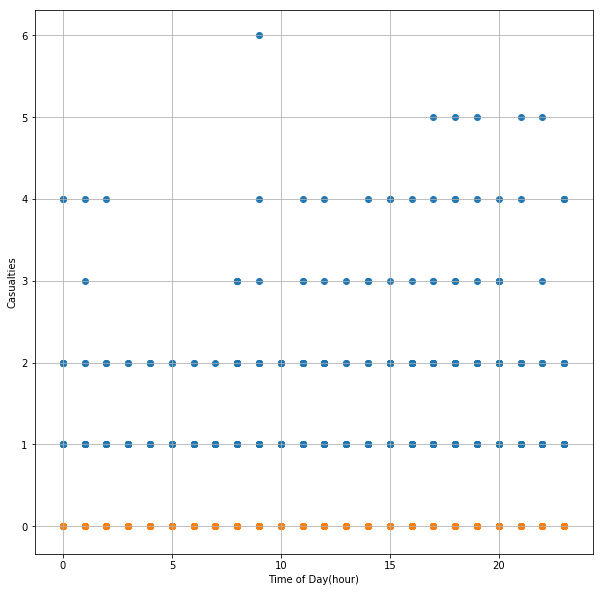

In [160]:
#Without binary class
casualties = np.sum(cas_data, axis=1)

# Create logistic Regression object and Fit Training Data - Casualties vs Time of Accident
logreg3 = linear_model.LogisticRegression(C = 1e5)
logreg3.fit(time_array2[0:1000], (casualties[0:1000]))# Use 100 values to determine classifier
cas_final_hat3 = logreg3.predict(time_array2[0:5000])

#cas_final_prob2 = logreg2.predict_proba(time_array2[0:500])
acc3 = np.mean(cas_final_hat3 == casualties[0:5000])
print('Accuracy is {0:f}' .format(acc3))

# Graph
plt.figure(figsize = (10,10))
plt.scatter(time_array2[0:5000], casualties[0:5000])
plt.scatter(time_array2[0:5000], cas_final_hat3[0:5000])
plt.grid()
plt.xlabel('Time of Day(hour)')
plt.ylabel('Casualties')

In [ ]:
#Extra
#datas = df.values[:, 7:8]
#causalties = datas.sum(axis=1)
#print(causalties[0:20])

# from sklearn import linear_model

# #Number of vehicles involved = # of entries filled in columns vehicle type code 1-5 for said accident 
# data = df.values[:, 20:25]
# #print(data[0:10, :])
# data2 = pd.DataFrame(data)
# vehicle_involved = data2.notnull().sum(axis=1)
# #print(vehicle_involved[0:20])
# veh_inv = vehicle_involved.as_matrix()
# print(veh_inv[0:20])

# #Fitting the model
# zip_train = zipcode[0:100]
# veh_train = veh_inv[0:100]
# veh_train = veh_train.reshape(-1,1)
# cas_train = causalties[0:100]
# #cas_train = cas_train.reshape(-1,1)

# regr = linear_model.LinearRegression()

# regr.fit(veh_train, cas_train)

# cas_predict = regr.predict(veh_train[0:100])
# plt.scatter(veh_train[0:100], cas_train[0:100])
# plt.plot(veh_train[0:100], cas_predict[0:100])